In [1]:
from model.data import StackedMNIST
from model.train.variational_autoencoder.variational_autoencoder import VariationalAutoEncoder
from model.train.variational_autoencoder.vae_trainer import VAETrainer

from model.settings import *
from model.test.verification_net import VerificationNet

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

from tqdm import tqdm
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
from model.utils import get_gpu
get_gpu()

Using GPU MPS: (0.00 GB available) driver memory: 0.00 GB


In [4]:
trainset = StackedMNIST(train=True, mode=AE_DATAMODE)
testset = StackedMNIST(train=False, mode=AE_DATAMODE)

/Users/arthurtestard/envs/ntnu/deeplearning/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
trainer = VAETrainer()

Could not read weights for verification_net from file. Must retrain...
device: mps


In [6]:
trainer.force_relearn = True

In [7]:
trainer.train(trainset=trainset,valset=testset)

Could not read weights for verification_net from file. Must retrain...


100%|██████████| 10/10 [02:01<00:00, 12.19s/it]


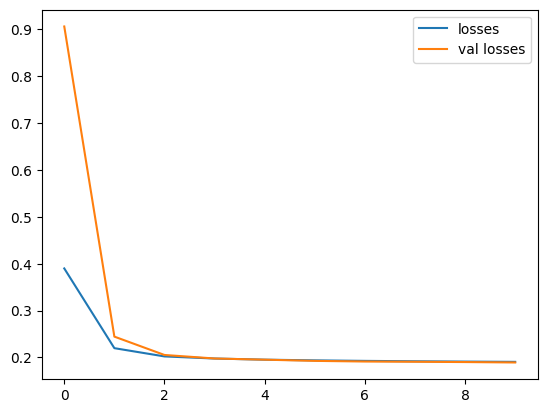

In [8]:
plt.plot(trainer.losses, label="losses")
plt.plot(trainer.val_losses, label="val losses")
plt.legend()

In [9]:
# Trainer = Trainer.load_trainer(trainer_file)

In [10]:
train_set = DataLoader(trainset, shuffle=True, batch_size=2048)
test_set = DataLoader(testset, shuffle=True, batch_size=2048)

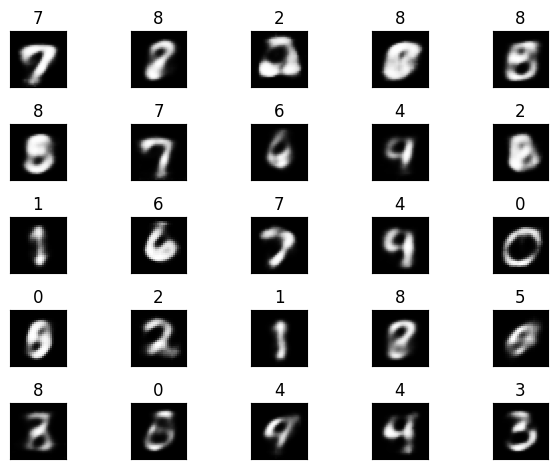

In [11]:
trainer.print_reconstructed_img(testset)


In [12]:
verifNet = VerificationNet()


In [13]:
trainer.print_class_coverage_and_predictability(verifNet, trainset)

Coverage: 100.00%
Predictability: 93.33%
Accuracy: 72.42%


In [14]:
trainer.print_class_coverage_and_predictability(verifNet, testset)


Coverage: 100.00%
Predictability: 93.24%
Accuracy: 72.84%
